## Session-1
### Data Pre-Processing/Visualization, Count Vectorizer/tf-idf & Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import nltk
#nltk.download('punkt')

In [3]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("C:\\Users\\THE ONE\\Desktop\\MARKOV\\NLP\\trainingandtestdata\\train.csv",encoding='latin1',names=cols)

In [4]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:

df2 = df[['sentiment', 'text']]
df2['sentiment'] = df2['sentiment'].replace({4:1})

E:\elec\anacondaa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df2

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
df2['sentiment'].value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [9]:
pat1 = '@[^ ]+'
pat2 = 'http[^ ]+'
pat3 = 'www.[^ ]+'
pat4 = '#[^ ]+'
pat5 = '[0-9]'

combined_pat = '|'.join((pat1, pat2, pat3, pat4, pat5))

'heeloko as vfvc SSA sad e d'

In [10]:
clean_tweets = []
for t in df2['text']:
    t = t.lower()
    stripped = re.sub(combined_pat, ' ', t)
    negations = re.sub("n't", "not", stripped)

    clean_tweets.append(negations)
    
"""    
for i in range(df4.shape[0]):
    clean_text = re.sub(combined_pat, ' ', df4['tweet'][i].lower())
    clean_tweet.append(clean_text)
"""

"    \nfor i in range(df4.shape[0]):\n    clean_text = re.sub(combined_pat, ' ', df4['tweet'][i].lower())\n    clean_tweet.append(clean_text)\n"

In [11]:
clean_tweets

["    - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d",
 'is upset that he canot update his facebook by texting it... and might cry as a result  school today also. blah!',
 '  i dived many times for the ball. managed to save   %  the rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "  no, it's not behaving at all. i'm mad. why am i here? because i canot see you all over there. ",
 '  not the whole crew ',
 'need a hug ',
 "  hey  long time no see! yes.. rains a bit ,only a bit  lol , i'm fine thanks , how's you ?",
 '  nope they didnot have it ',
 '  que me muera ? ',
 "spring break in plain city... it's snowing ",
 'i just re-pierced my ears ',
 '  i couldnot bear to watch it.  and i thought the ua loss was embarrassing . . . . .',
 '  it it counts, idk why i did either. you never talk to me anymore ',
 "  i would've been the first, but i didnot have a gun.    not really though, zac snyder's just a doucheclown.",
 '  i wish i 

In [12]:
clean_df = pd.DataFrame(clean_tweets, columns=['text'])
clean_df ['sentiment'] = df2['sentiment']

In [13]:
clean_df.head()

,text,sentiment
0,"- awww, that's a bummer. you shoulda got ...",0
1,is upset that he canot update his facebook by ...,0
2,i dived many times for the ball. managed to ...,0
3,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why a...",0


In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text         1600000 non-null object
sentiment    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [15]:
#Visualize high-frequency Neg & Pos Tweets

In [15]:
neg_tweets = clean_df.loc[clean_df['sentiment']==0]
pos_tweets = clean_df.loc[clean_df['sentiment']==1]

In [16]:
type(pos_tweets)

pandas.core.frame.DataFrame

In [28]:
pos_tweets['text']

800000                         i love   u guys r the best!! 
800001     im meeting up with one of my besties tonight! ...
800002       thanks for the twitter add, sunisa! i got to...
800003     being sick can be really cheap when it hurts t...
800004                       he has that effect on everyone 
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy   th birthday to my boo of alll time!!! ...
1599999                                       happy         
Name: text, Length: 800000, dtype: object

In [17]:
type(neg_tweets['text'])

pandas.core.series.Series

In [18]:
neg_string = neg_tweets['text'].str.cat(sep=' ')
pos_string = pos_tweets['text'].str.cat(sep=' ')

In [19]:
neg_string

"  .... but i want it to be real. you would level up your geek cred!    i feel bad for the zines i still need to send you! eep! same goes to   i'm sorry    loving the zune, hating the lack of canada love  i'm freaking hell tired,but i donot feel like sleeping. i dont know why  off to bed. my shakespeare final is tomorrow and i so donot feel ready for it.  ugh, how could i forgot my glove full of water with an eyeball in it!?  rest in peace grandma. gone but never forgotten. gonna put her   feet under the ground tomorrow      love you&amp;miss you!  &lt;/  has just woke up , got a mega hangover  have no laptop, no moe twitter for me  history exam in an hour. been up since six and am feeling physically sick. eurgh, canot wait for it to be over     wish we could go to tortola again    haha aww i'm going to miss these moments  love you! blink in the hallway today...blue t-shirt cult    it's good to know they're ok, but how frustrating and scary! at graduation. sombody house is burn dwn.  o

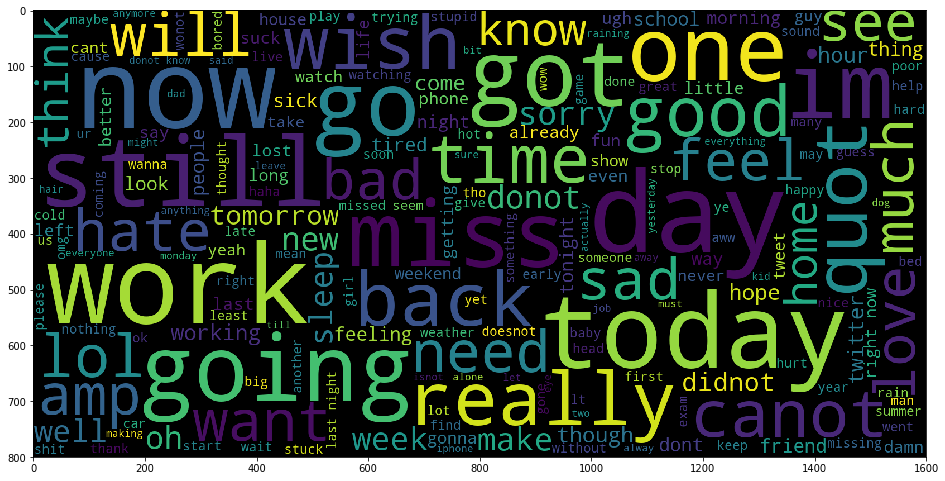

In [28]:
plt.figure(figsize=(16,10))
wordcloud_neg = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)
plt.imshow(wordcloud_neg)
plt.show()

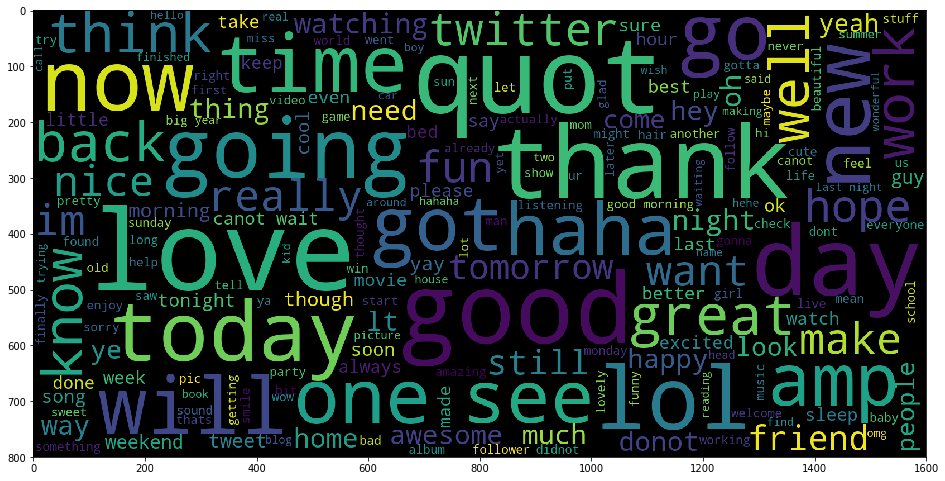

In [30]:
plt.figure(figsize=(16,10))
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_string)
plt.imshow(wordcloud_pos)
plt.show()

In [94]:
t = ["hey hey, lets get launch :)", " i need a favor!!!"]

In [95]:
cv = CountVectorizer(stop_words='english')

In [96]:
cv.fit(t)

CountVectorizer(stop_words='english')

In [97]:
cv.get_feature_names()

['favor', 'hey', 'launch', 'lets', 'need']

In [98]:
cv.vocabulary_

{'hey': 1, 'lets': 3, 'launch': 2, 'need': 4, 'favor': 0}

In [99]:
tt = cv.transform(t)

In [100]:
tt

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [101]:
tt.toarray()

array([[0, 2, 1, 1, 0],
       [1, 0, 0, 0, 1]], dtype=int64)

In [103]:
tf = TfidfVectorizer()

In [119]:
tf.fit(t)

TfidfVectorizer()

In [120]:
aa = tf.transform(t)

In [118]:
t = ["hey hey, lets get launch :)", " hey, i need a favor!!!"]

In [117]:
tf.vocabulary_

{'hey': 2, 'lets': 4, 'get': 1, 'launch': 3, 'need': 5, 'favor': 0}

In [109]:
tf.get_feature_names()

['favor', 'get', 'hey', 'launch', 'lets', 'need']

In [106]:
aa

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [121]:
aa.toarray()

array([[0.        , 0.44610081, 0.6348088 , 0.44610081, 0.44610081,
        0.        ],
       [0.49844628, 0.        , 0.70929727, 0.        , 0.        ,
        0.49844628]])

In [122]:
clean_df

,text,sentiment
0,.... but i want it to be real. you would lev...,0
1,- just finished dust and moonlight this week...,1
2,i feel bad for the zines i still need to sen...,0
3,sounds like it was a blast! have a safe flig...,1
4,"loving the zune, hating the lack of canada l...",0
...,...,...
9995,"suspense is killing me, but it has to take a w...",1
9996,haha yeah that's a highlight for me at the m...,1
9997,i'm up if you need someone to talk to about ...,1
9998,"i donâ´t know why, but, i believe that itâ´...",0


In [20]:
x = clean_df['text']
y = clean_df['sentiment']

In [30]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: sentiment, Length: 1600000, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2),max_df=0.3,min_df=1)

In [58]:
cv.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.3, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [59]:
len(cv.get_feature_names())

3415660

In [139]:
cv.vocabulary_

{'dunno': 18786,
 'im': 34662,
 'early': 18932,
 'yea': 84232,
 'night': 50752,
 'alright': 1464,
 'mayb': 46007,
 'settin': 63455,
 'notifications': 51449,
 'sure': 69386,
 'dunno im': 18787,
 'im early': 34715,
 'early yea': 19007,
 'yea night': 84252,
 'night alright': 50757,
 'alright mayb': 1470,
 'mayb settin': 46008,
 'settin notifications': 63456,
 'notifications im': 51450,
 'im sure': 34987,
 'dunno im early': 18788,
 'im early yea': 34716,
 'early yea night': 19008,
 'yea night alright': 84253,
 'night alright mayb': 50758,
 'alright mayb settin': 1471,
 'mayb settin notifications': 46009,
 'settin notifications im': 63457,
 'notifications im sure': 51451,
 'work': 82649,
 'missing': 47607,
 'shimshon': 63766,
 'sweetest': 69778,
 'amp': 1670,
 'fluffiest': 23062,
 'cat': 9607,
 'world': 83230,
 'held': 31585,
 'hand': 30031,
 'like': 40858,
 'babies': 4002,
 'does': 17109,
 'love': 43830,
 'bad': 4144,
 'work missing': 82849,
 'missing shimshon': 47665,
 'shimshon sweetest'

In [48]:
x_train_cv = cv.transform(x_train)

In [49]:
x_train_cv

<1280000x200000 sparse matrix of type '<class 'numpy.int64'>'
	with 10762539 stored elements in Compressed Sparse Row format>

In [50]:
x_train_cv.toarray

<bound method _cs_matrix.toarray of <1280000x200000 sparse matrix of type '<class 'numpy.int64'>'
	with 10762539 stored elements in Compressed Sparse Row format>>

In [51]:
x_test_cv = cv.transform(x_test)

In [52]:
lr = LogisticRegression()
lr.fit(x_train_cv, y_train)

y_pred_train = lr.predict(x_train_cv)
print('Training Accuracy: ', accuracy_score(y_pred_train, y_train))

y_pred = lr.predict(x_test_cv)
print('Testing Accuracy: ', accuracy_score(y_pred, y_test))

E:\elec\anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy:  0.8364203125
Testing Accuracy:  0.785546875


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk import word_tokenize
from nltk.corpus import stopwords
#You will have to download the set of punkts & stop words the first time only
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

Using TensorFlow backend.


In [ ]:
#import nltk
#nltk.download('stopwords')

In [54]:
x_train_cv.shape[1]

200000

In [55]:
#Apply NN Model on count vectorizer
model_1 = Sequential()

model_1.add(Dense(name='Ahmed', units=64, activation='relu', input_dim=x_train_cv.shape[1]))
model_1.add(Dropout(0.3))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_1.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Ahmed (Dense)                (None, 64)                12800064  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,800,129
Trainable params: 12,800,129
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_1.fit(x_train_cv, y_train, epochs=5, batch_size=32, validation_data=(x_test_cv,y_test))


Train on 1280000 samples, validate on 320000 samples
Epoch 1/5
   2240/1280000 [..............................] - ETA: 3:11:14 - loss: 0.6760 - accuracy: 0.6321

KeyboardInterrupt: 

In [158]:
from keras.models import model_from_json

# save model to JSON
model_json = model_1.to_json()
with open("model_1.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
model_1.save_weights("model_1.h5")
print("Model saved to disk")


# load json and create model
json_file = open("model_1.json")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into the new model
loaded_model.load_weights("model_1.h5")
print("Model loaded from disk")

In [159]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5476288   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,476,353
Trainable params: 5,476,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_model.load_weights("model_1.h5")
print("Model loaded from disk")

In [22]:
#Remove stop words before RNN
stop_words = stopwords.words('english')
x_train_rnn = []
for text in x_train:
    tokenized_words = word_tokenize(text)
    non_stop_words = [i for i in tokenized_words if i not in stop_words]
    tweets = " ".join(non_stop_words)
    
    x_train_rnn.append(tweets)

KeyboardInterrupt: 

In [ ]:
stop_words

In [166]:
text

'  marty the cowboy dooooog haha im bored  minding bams dog til she gets back'

In [165]:
tokenized_words

['marty',
 'the',
 'cowboy',
 'dooooog',
 'haha',
 'im',
 'bored',
 'minding',
 'bams',
 'dog',
 'til',
 'she',
 'gets',
 'back']

In [167]:
non_stop_words

['marty',
 'cowboy',
 'dooooog',
 'haha',
 'im',
 'bored',
 'minding',
 'bams',
 'dog',
 'til',
 'gets',
 'back']

In [168]:
tweets

'marty cowboy dooooog haha im bored minding bams dog til gets back'

In [169]:
x_train_rnn

['dunno im early , yea last night alright mayb settin notifications , im sure !',
 "work..missing shimshon sweetest & amp ; fluffiest cat world.. held hand like babies ! ! love ! ! ! bad 's mine..",
 'via playlist . & lt ; -- -',
 'rlly bad dream canot go back sleep . -',
 'need job .',
 'double p.e first second tomorow , thats nae gid : -| p.e droupout ! : l : l !',
 'finished chick-fil-a sandwich . wont one awhile',
 'stupid twitter longer sending tweets',
 'fare ... .u still something wit melo ... though may b alot.u still communicate.. ! ! ! dont ... ... justin bobby',
 "congrats , name baby yet ? btw much debate 're settled annica correct spelling better half",
 'another overcast day beach , seeing pixar today~',
 "stupid people . whats wrong ? 'm bored . breakfast break . boring stuff guess",
 'canot sleep ... oc though ... wish ry got phone back',
 'voted ! deserve ! could reply fans',
 'daysssss ! !',
 'thank ! !',
 'suffering sinus problems',
 'canooing ?',
 'thanks lot ! ! !'

In [170]:
#Tokenization
tk = Tokenizer()
tk.fit_on_texts(x_train_rnn)

In [175]:
tk.word_index

{"'s": 1,
 "'m": 2,
 'good': 3,
 'day': 4,
 'like': 5,
 'quot': 6,
 'get': 7,
 'love': 8,
 'go': 9,
 'today': 10,
 'got': 11,
 'going': 12,
 'work': 13,
 'u': 14,
 'back': 15,
 'lol': 16,
 'time': 17,
 'im': 18,
 'one': 19,
 'still': 20,
 'know': 21,
 'canot': 22,
 'see': 23,
 'donot': 24,
 'really': 25,
 'new': 26,
 'amp': 27,
 "'ll": 28,
 'na': 29,
 'night': 30,
 'think': 31,
 'much': 32,
 'want': 33,
 'well': 34,
 'last': 35,
 'home': 36,
 'miss': 37,
 'thanks': 38,
 'oh': 39,
 'great': 40,
 'hope': 41,
 'tomorrow': 42,
 "'re": 43,
 'need': 44,
 'morning': 45,
 'twitter': 46,
 'wish': 47,
 'haha': 48,
 'feel': 49,
 'sleep': 50,
 'bad': 51,
 'could': 52,
 'fun': 53,
 'though': 54,
 'come': 55,
 'sorry': 56,
 'gon': 57,
 'right': 58,
 'make': 59,
 'wait': 60,
 'watching': 61,
 'people': 62,
 'bed': 63,
 'better': 64,
 'getting': 65,
 'would': 66,
 'way': 67,
 'nice': 68,
 'hate': 69,
 'happy': 70,
 "'": 71,
 'sad': 72,
 'tonight': 73,
 'school': 74,
 'even': 75,
 'week': 76,
 'dont': 

In [173]:
x_train_tok = tk.texts_to_sequences(x_train_rnn)
x_test_tok = tk.texts_to_sequences(x_test)

In [174]:
x_train_tok

[[1319, 18, 166, 423, 35, 30, 707, 4435, 4436, 4437, 18, 89],
 [13, 191, 4438, 4439, 27, 4440, 708, 227, 1815, 447, 5, 1320, 8, 51, 1, 386],
 [573, 2207, 84],
 [4441, 51, 548, 22, 9, 15, 50],
 [44, 290],
 [593, 316, 317, 115, 623, 1542, 213, 2208, 4442, 316, 317, 4443, 363, 363],
 [271, 894, 2918, 470, 1321, 471, 19, 1322],
 [214, 46, 813, 1816, 263],
 [4444,
  14,
  20,
  107,
  814,
  4445,
  54,
  248,
  196,
  624,
  14,
  20,
  2209,
  77,
  1543,
  4446],
 [594, 348, 145, 142, 500, 32, 4447, 43, 1817, 4448, 1544, 2210, 64, 310],
 [97, 1818, 4, 300, 387, 2211, 10],
 [214, 62, 664, 318, 2, 138, 349, 291, 501, 197, 182],
 [22, 50, 2212, 54, 47, 4449, 11, 143, 15],
 [1323, 815, 52, 364, 895],
 [2919],
 [85],
 [2213, 2920, 976],
 [4450],
 [38, 192],
 [19, 222, 173, 707],
 [1819, 22, 60, 242, 7, 517, 144, 75, 64, 517],
 [215, 595, 2214, 518, 174, 2921, 1820],
 [233],
 [311, 61, 175, 709, 90, 360, 4451, 350],
 [1545, 4452, 1545, 2922, 4453, 2215, 424, 4454, 1545, 2922, 4455],
 [16, 2216

In [176]:
#length of maximum document
max_len=0
for i in x_train_tok:
    if(max_len<len(i)):
        max_len=len(i)
print("The maximum number of words in all documents is : " , max_len)

The maximum number of words in all documents is :  31


In [177]:
#Padding
x_train_pad = pad_sequences(x_train_tok, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_tok, maxlen=max_len, padding='post')

In [178]:
x_train_pad

array([[ 1319,    18,   166, ...,     0,     0,     0],
       [   13,   191,  4438, ...,     0,     0,     0],
       [  573,  2207,    84, ...,     0,     0,     0],
       ...,
       [   38,    31,     0, ...,     0,     0,     0],
       [   98,     8,     2, ...,     0,     0,     0],
       [11560,  3327, 11561, ...,     0,     0,     0]])

In [179]:
y_train_pad = y_train.reset_index(drop=True)

In [181]:
y_train_pad

0       1
1       0
2       1
3       0
4       0
       ..
7995    1
7996    1
7997    1
7998    1
7999    0
Name: sentiment, Length: 8000, dtype: int64

In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9697672053345195699
]
